In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
from KeywordExtractor import *
from gensim.models import Word2Vec
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import wordnet


In [2]:
# WORD EMBEDDINGS
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
# Download a pre-trained Word2Vec model (you can choose other models as well)
model_name = "glove-wiki-gigaword-50"

# Download and load the model (this might take a while to download)
# model = api.load(model_name)
# model.save('data/model.model')

In [15]:
abstract = load_abstract('ex1')
#abstract = "The country of Japan has developed to a great economy after WW1. Japan is a developed island nation. The cats are jumping over the fences."
abstract = "I like deep learning. I like NLP. I enjoy flying. Japan is a developed island nation. I like Japan because it is an island. "
ke = KeywordExtractor(abstract=abstract)
print(ke.tokens)
print(ke.sentences)
print(ke.co)
ke.graph.nodes

['like', 'deep_learning', 'like', 'nlp', 'enjoy', 'fly', 'japan', 'developed', 'island', 'nation', 'like', 'japan', 'island']
[['like', 'deep_learning'], ['like', 'nlp'], ['enjoy', 'fly'], ['japan', 'developed', 'island', 'nation'], ['like', 'japan', 'island']]
{('deep_learning', 'like'): 1, ('like', 'nlp'): 1, ('enjoy', 'fly'): 1, ('developed', 'japan'): 1, ('island', 'japan'): 2, ('developed', 'island'): 2, ('developed', 'nation'): 1, ('island', 'nation'): 1, ('japan', 'like'): 1, ('island', 'like'): 1}


NodeView(('developed', 'japan', 'island', 'nation', 'like', 'fly', 'enjoy', 'deep_learning', 'nlp'))

9
[('developed', 'japan'), ('developed', 'island'), ('developed', 'nation'), ('japan', 'island'), ('japan', 'like'), ('island', 'nation'), ('island', 'like'), ('like', 'deep_learning'), ('like', 'nlp'), ('fly', 'enjoy')]
{('developed', 'japan'): 1, ('developed', 'island'): 2, ('developed', 'nation'): 1, ('japan', 'island'): 2, ('japan', 'like'): 1, ('island', 'nation'): 1, ('island', 'like'): 1, ('like', 'deep_learning'): 1, ('like', 'nlp'): 1, ('fly', 'enjoy'): 1}


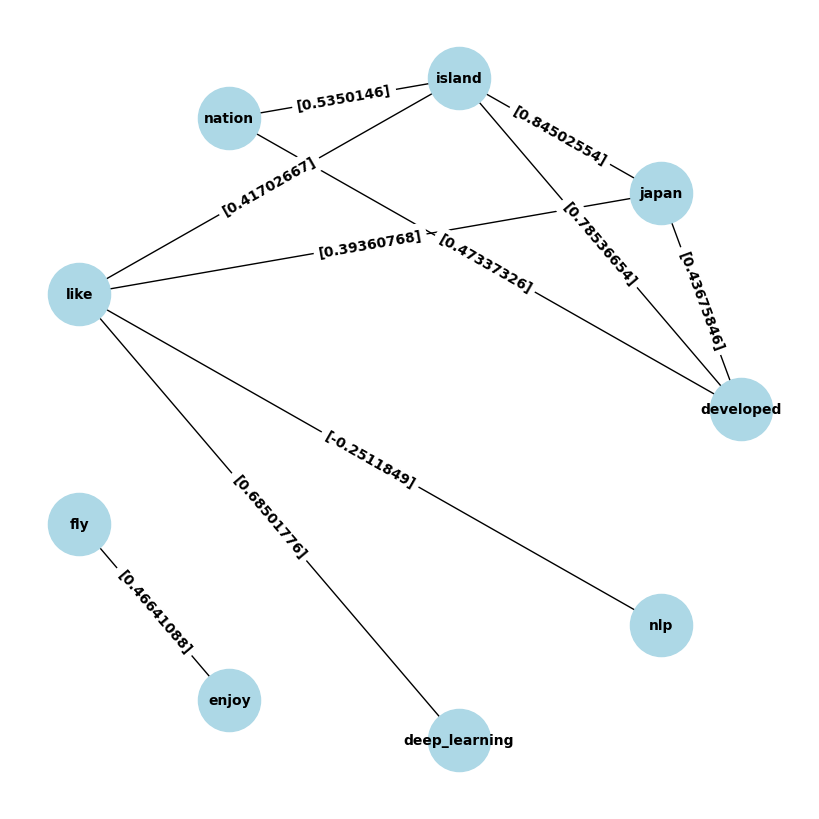

In [16]:
print(len(ke.unique_tokens))
labels = nx.get_edge_attributes(ke.graph,'weight')
print(ke.graph.edges)
print(labels)
ke.add_word_em_weights()
ke.visualize_graph()

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

model = KeyedVectors.load('data/model.model')
a = get_word_em("nlp")
b = get_word_em("apple")
print(model.similarity("nlp", "apple"))
print(cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))[0])
similar_words = model.similar_by_vector(a, topn=5)
print("\nWords similar to:")
for word, score in similar_words:
    print(f"{word}: {score}")

0.1576503
[0.1576503]

Words similar to:
nlp: 0.9999998807907104
hagelin: 0.7022942304611206
.760: 0.6916053891181946
inp: 0.6835891008377075
+18: 0.673696756362915


In [6]:
model = KeyedVectors.load('data/model.model')
# Find the vector representation of a word
word_vector = model["apple"]
print("Vector representation of 'apple':")
print(word_vector)

# Find similar words
similar_words = model.most_similar("apple", topn=5)
print("\nWords similar to 'apple':")
for word, score in similar_words:
    print(f"{word}: {score}")

# Perform vector arithmetic (e.g., king - man + woman = queen)
result = model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
print("\n'king' - 'man' + 'woman' =")
for word, score in result:
    print(f"{word}: {score}")

# Assuming you have already loaded a pretrained Word2Vec model
word1 = "learning"
word2 = "island"

# Calculate the similarity between two words
similarity_score = model.similarity(word1, word2)

print(f"Similarity between '{word1}' and '{word2}': {similarity_score:.2f}")


Vector representation of 'apple':
[ 0.52042  -0.8314    0.49961   1.2893    0.1151    0.057521 -1.3753
 -0.97313   0.18346   0.47672  -0.15112   0.35532   0.25912  -0.77857
  0.52181   0.47695  -1.4251    0.858     0.59821  -1.0903    0.33574
 -0.60891   0.41742   0.21569  -0.07417  -0.5822   -0.4502    0.17253
  0.16448  -0.38413   2.3283   -0.66682  -0.58181   0.74389   0.095015
 -0.47865  -0.84591   0.38704   0.23693  -1.5523    0.64802  -0.16521
 -1.4719   -0.16224   0.79857   0.97391   0.40027  -0.21912  -0.30938
  0.26581 ]

Words similar to 'apple':
blackberry: 0.7543067932128906
chips: 0.7438643574714661
iphone: 0.7429664134979248
microsoft: 0.7334205508232117
ipad: 0.7331036925315857

'king' - 'man' + 'woman' =
queen: 0.8523604273796082
Similarity between 'learning' and 'island': 0.25
